In [43]:
import pandas as pd
import seaborn as sns
from glob import glob
from matplotlib.font_manager import fontManager, FontProperties

path = "/usr/share/fonts/opentype/linux-libertine/LinBiolinum_R.otf"
fontManager.addfont(path)
sns.set_theme(style="ticks", font=FontProperties(fname=path).get_name(), font_scale=1.2)

In [44]:
data = pd.concat([pd.read_csv(data, names=[
    "Variant", "#Replica/Region", "#Client/Region", "#PutClient/Region", "Throughput", "Latency"
]) for data in glob('cops-*.txt')], ignore_index=True)
data["Put %"] = data["#PutClient/Region"] / 2 / data["#Client/Region"] * 100
data = data.sort_values(by="Latency")
data

,Variant,#Replica/Region,#Client/Region,#PutClient/Region,Throughput,Latency,Put %
23,Untrusted,1,5,2,41662.098,0.000625,20.00
21,Untrusted,1,10,4,55402.190,0.000913,20.00
36,Quorum,1,5,2,27712.197,0.001366,20.00
17,Untrusted,1,10,4,69394.016,0.001450,20.00
8,Quorum,1,10,4,42850.395,0.001992,20.00
3,Untrusted,1,20,8,80804.484,0.002483,20.00
5,Quorum,1,10,4,56468.094,0.003260,20.00
9,Untrusted,1,30,12,87665.440,0.003428,20.00
33,Untrusted,1,40,16,92614.850,0.004341,20.00
41,Untrusted,1,50,20,96391.300,0.005236,20.00


/tmp/ipykernel_558622/344814932.py:1: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  f = sns.lineplot(data=data[data["Put %"] == 20],


[(0.0, 110000.0), (0.0, 0.011)]

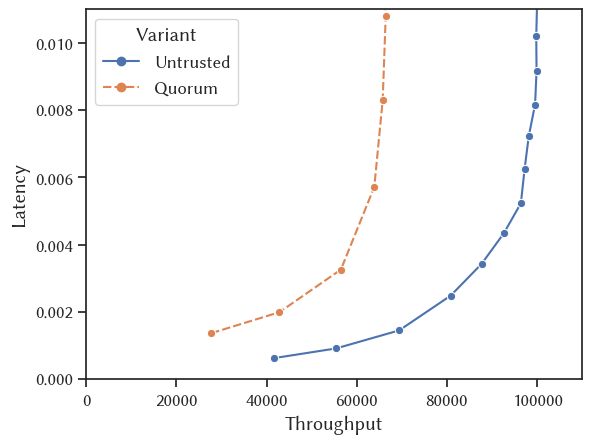

In [45]:
f = sns.lineplot(data=data[data["Put %"] == 20],
    x="Throughput", y="Latency", sort=False,
    hue="Variant", style="Variant", markers=['o'])
f.set(xlim=(0, 110000), ylim=(0, 0.011))

/tmp/ipykernel_558622/3893869525.py:1: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  f = sns.lineplot(data=data.groupby(["Put %", "Variant"]).max(),


[(0.0, 380000.0)]

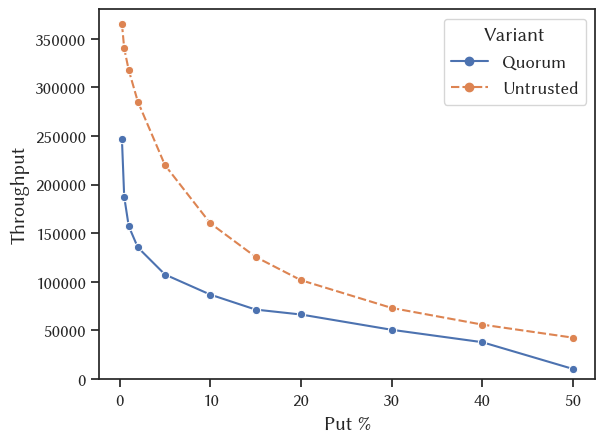

In [46]:
f = sns.lineplot(data=data.groupby(["Put %", "Variant"]).max(),
    x="Put %", y="Throughput", hue="Variant", style="Variant", markers=['o'])
f.set(ylim=(0, 380000))